In [ ]:
# 简单举例
python_code = '''
import pandas as pd
# 生成一个DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
'''

exec(python_code)

In [1]:
from tools.llm_api import *

import re
# function: 使用re提取text中的代码
def extract_code(text):
    # 使用正则表达式提取所有的代码块
    code_blocks = re.findall(r"```python(.*?)```", text, re.DOTALL)
    # 合并所有代码块为一个字符串
    combined_code = "\n".join(code_blocks)
    return combined_code  # 返回合并后的代码块

model = "deepseek-chat"
prompt = '''
请生成一个python代码,可以画出两只虚拟的股票的走势图,需要非常接近真实走势。
'''

ans = ""
for char in get_llm_answer(prompt, model, temperature=0.7):
    ans += char
    print(char, end="", flush=True)


要生成非常接近真实走势的虚拟股票数据，我们需要使用随机数生成器来模拟股票价格的波动。我们可以使用Python的`numpy`库来生成随机数，并使用`matplotlib`库来绘制走势图。以下是一个简单的示例代码，它生成了两只虚拟股票的走势图：

```python
import numpy as np
import matplotlib.pyplot as plt

# 设置随机数种子，以便结果可重复
np.random.seed(0)

# 生成虚拟股票数据
# 假设股票A和股票B的初始价格都是100
initial_price_A = 100
initial_price_B = 100

# 模拟50个交易日的数据
num_days = 50

# 使用随机游走模型生成价格数据
# 每天价格的波动范围在-2%到2%之间
price_A = [initial_price_A]
price_B = [initial_price_B]

for _ in range(num_days):
    # 计算每日价格变化
    daily_change_A = np.random.uniform(-0.02, 0.02)
    daily_change_B = np.random.uniform(-0.02, 0.02)
    
    # 更新价格
    price_A.append(price_A[-1] * (1 + daily_change_A))
    price_B.append(price_B[-1] * (1 + daily_change_B))

# 绘制走势图
plt.figure(figsize=(10, 5))
plt.plot(range(num_days + 1), price_A, label='Stock A')
plt.plot(range(num_days + 1), price_B, label='Stock B')
plt.title('Simulated Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
```

这段代码首先设置了随机数种子，然后定义了两只股票的初始价格和模拟的交易天数

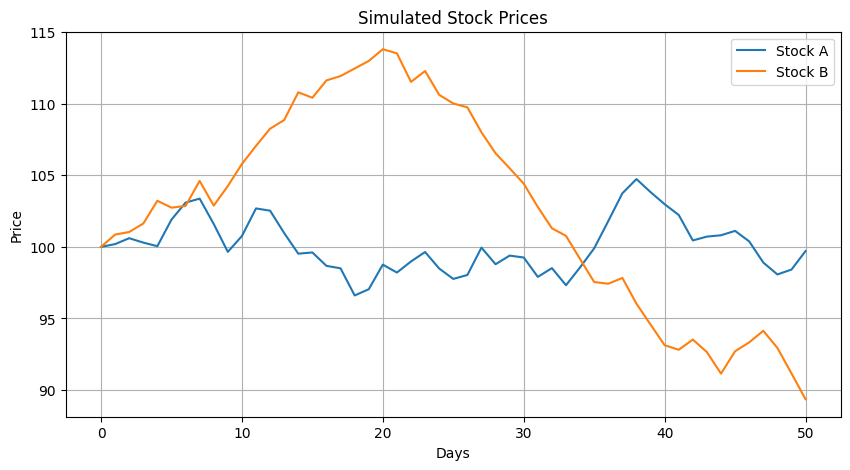

In [2]:
code = extract_code(ans)
exec(code)